# EPIC Data Challenge (Work Submission)

In [5]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import datetime
%config InlineBackend.figure_format = 'png
%matplotlib inline

import nltk 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
 
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Loading BokehJS ...

In [ ]:
with open(r'C:\Users\USER\Documents\GitHub\nlp_challege\datasets\articles.json', 'r', encoding="utf-8") as json_file:
   json_work = json.load(json_file)

df = pd.io.json.json_normalize(json_work)

df1 = pd.read_csv(r'C:\Users\USER\Documents\GitHub\nlp_challege\articles.csv', index_col = ['Date'], parse_dates=['Date'])

# Introduction

**Authors of Work Submission**: Pan Sewen, Mia Raghavan,  Jia Qi, Hanna Nabilah Fatimah 


_Methodology_


1. ***Exploratory Data Analysis***:
    - Correlation Heatmap
    - Preliminary Statistics
    - Top 10 Publishers by Social Media Engagement
    - Top 10 Publishers by Frequency of Reporting 
    - Top 10 Most Frequent Words in Headlines
    - Time-Series of Facebook Shares (2017-2018)
    
    
2. ***Feature Engineering By Topic Identification***:
    - Topic Modelling Using LSA/DSA
    - Topic Results of Model
    - Visualising LSA-based clustering. 
    
    
3. ***Applying New Features + Modelling***: 
    - Distribution of Categories
    - Word Associations between Categories
    - GLM: Correlation between Categories and Social Media Engagement 
    - Bayes Classifier
    
4. ***Conclusion and Results***

# Section 1: Exploratory Data Analysis

In [ ]:
df.info()

There is a mix of both categorical and numeric variables that are present within the dataset. We're going to isolate the numeric variables to see if we can find a correlation between them.

## Correlation Heatmap

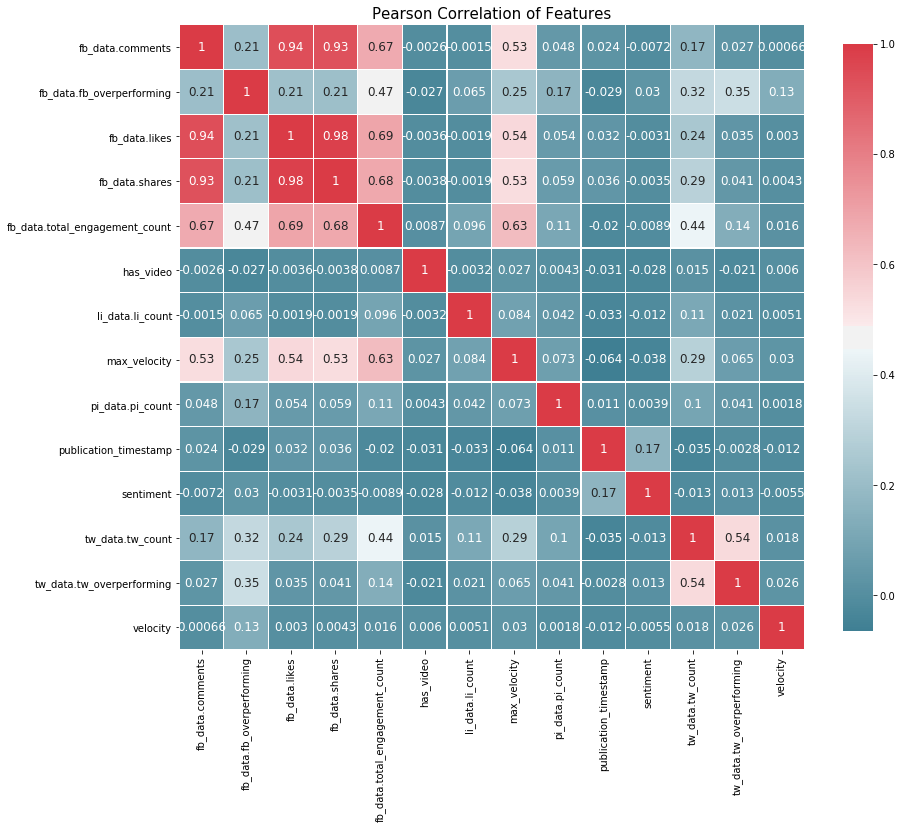

In [6]:
def correlation_heatmap(DF):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        DF.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)


#  Preliminary Statistics 

In [7]:
a = len(df['source.country'].unique())

print("There are", a, " countries that are listed within the dataset.")

b = len(df['source.publisher'].unique())

print("There are", b, " unique publishers that are listed within the dataset.")


c = len(df['contents'].unique())

print("There are", c, " unique publishers that are listed within the dataset.")

df_source = df[['source.country', 'source.publisher', 'source.country_code', 'tw_data.tw_count']]

There are 89  countries that are listed within the dataset.
There are 3763  unique publishers that are listed within the dataset.


# Top 10 Publishers by Frequency

In [41]:
top_publishers = pd.DataFrame(df['source.publisher'].value_counts())

top_publishers.head(20)

,source.publisher
yahoo.com,964
cbsnews.com,569
boardingarea.com,556
nbc.com,534
foxnews.com,516
flyertalk.com,400
aviationpros.com,300
4-traders.com,291
sfgate.com,266
thevillagessuntimes.com,245


# Top 10 Publishers by Social Media Shares

In [42]:
social_media = df[['excerpt','source.publisher', 'sentiment','source.country', 'fb_data.total_engagement_count', 'tw_data.tw_count', 'fb_data.shares']]

social_media = social_media.sort_values(by='tw_data.tw_count', ascending = False)

social_media.head(10)

,excerpt,source.publisher,sentiment,source.country,fb_data.total_engagement_count,tw_data.tw_count,fb_data.shares
35898,Airline pilots are very worried about the gove...,inc.com,0.0,United States,118793,30913,19973
3581,A video posted on Facebook late Sunday evening...,courier-journal.com,0.0,United States,54480,18760,0
4655,WASHINGTON — The Pentagon announced Tuesday it...,duffelblog.com,0.0,United States,438322,12000,0
5400,United Airlines employees used proper protocol...,usatoday.com,0.0,United States,50640,9120,0
23019,United Airlines has apologized to a female pas...,nypost.com,0.0,United States,8457,7310,0
32768,United Airlines has announced it will donate f...,breitbart.com,1.0,United States,23759,5460,3517
23021,A woman who booked a flight from Houston to Wa...,foxnews.com,-1.0,United States,6820,5176,0
3586,The airline said the plane wouldn't take off u...,huffingtonpost.com,-1.0,United States,47191,5000,0
11824,Pepsi and United Airlines just welcomed Adidas...,twentytwowords.com,0.0,United States,1675,4870,0
4681,"""We'll beat you so badly you'll be using your ...",huffingtonpost.com,0.0,United States,49574,4830,0


# Time-Series of Social Media Metrics of Crisis Reporting 

In [ ]:
df_corr = df1[df1['fb_data.shares']<1000 ]
df_corr = df_corr[df_corr['tw_data.tw_count']<1000 ]
df_corr = df_corr[df_corr['fb_data.likes']<1000]
plt.figure(figsize=(10,10))
plt.title("Daily Shares of Crises Events in 2017-2019 (Excluding Outliers)")
sns.lineplot(data=df_corr['fb_data.shares'], label='Facebook (Shares)')
sns.lineplot(data=df_corr['tw_data.tw_count'], label='Twitter (Tweets)')
sns.lineplot(data=df_corr['fb_data.likes'], label='Facebook (Likes)')

plt.xlabel("Date")

# Time Series of High Performing Facebook Engagement 

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df1['fb_data.total_engagement_count'], color='C0')
plt.title('FB Total Engagement (hourly data)')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(a['fb_data.shares'])
plt.title('FB Shares (hourly data)')
plt.grid(True)
plt.show()

# Displaying the Top Most Frequent Words In Headlines

In [54]:
stop = stopwords.words('english')

### Remove special characters 
df['headline']= df['headline'].str.replace('[^\w\s]','')
df['headline'] = df['headline'].apply(lambda x: " ".join(x.lower() for x in x.split()))
### Remove stop words 
df['headline']  = df['headline'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#Remove the most common brand words 
df['headline'] = df['headline'].str.replace('United Airlines|man|new|ay|united|rabbit|airlines|Illinois|flight|flights|airline|dog|us|ceo|passenger|s|plane', "")


freq = pd.Series(' '.join(df['headline']).split()).value_counts()[:10]
freq = list(freq.index)
freq1 = pd.Series(' '.join(df['headline']).split()).value_counts()[-10:]
freq1= list(freq1.index)


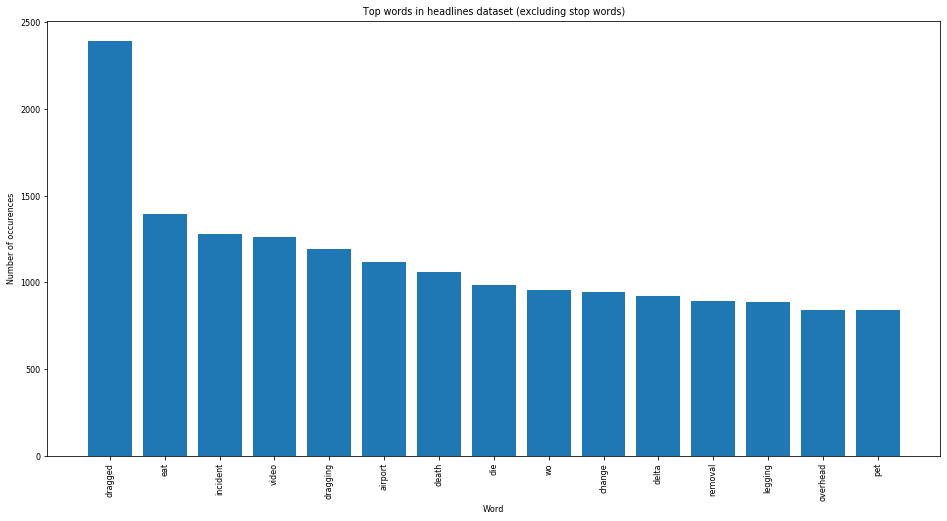

In [55]:
count_vectorizer = CountVectorizer(stop_words='english')

def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['headline'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

# Section 2: Trend Identification 

# Sentiment Analysis of Headlines

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import re

df['contents'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in df['contents']]       
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(df['text_lem'].str.upper())
sid = SentimentIntensityAnalyzer()
df['sentiment_compound_polarity']=df.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
df['sentiment_neutral']=df.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
df['sentiment_negative']=df.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
df['sentiment_pos']=df.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
df['sentiment_type']=''
df.loc[df.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
df.loc[df.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
df.loc[df.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [ ]:
df_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
df_sentiment.rename("",inplace=True)
explode = (1, 0, 0)
plt.subplot(221)
df_sentiment.transpose().plot(kind='barh',figsize=(20, 20))
plt.title('Sentiment Analysis 1')
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2')
plt.show()

# Creating Distinct Topic Clusters Using LSA and DSA

# # Pre-processing

We now apply a clustering algorithm to the headlines corpus in order to study the topic focus of Airlines, 
as well as how it has evolved through time. To do so, we first experiment with a small subsample of 
the dataset in order to determine which of the two potential clustering algorithms is most appropriate –
once this has been ascertained, we then scale up to a larger portion of the available data.



In [ ]:
df['contents'] = df['contents'].str.replace('United|united|airlines|Airlines|japan|like|people|they|said|passengers|passenger', "")

reindexed_data = df['contents']

small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = reindexed_data.sample(n=10000, random_state=0).values

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)



Thus we have our (very high-rank and sparse) training data, 
small_document_term_matrix, and can now actually implement a clustering algorithm. 
Our choice will be either Latent Semantic Analysis or Latent Dirichilet Allocation. 
Both will take our document-term matrix as input and yield an  n×N  topic matrix as output, where  N  is the 
number of topic categories (which we supply as a parameter). For the moment, we shall take this to be 10.


In [ ]:
n_topics = 10

# Latent Semantic Analysis


Let's start by experimenting with LSA. 
This is effectively just a truncated singular value decomposition of a 
(very high-rank and sparse) document-term matrix, with only the  r= n_topics largest singular values preserved.


In [ ]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)


# Top Most Frequent Words Per Topic

Taking the  argmax  of each headline in this topic matrix will 
give the predicted topics of each headline in the sample. We can then sort these into counts of each topic.
However, these topic categories are in and of themselves a little meaningless. 
In order to better characterise them, it will be helpful to find the most frequent words in each.

In [ ]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])


In [ ]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,30))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.show()

# Demonstrating the Clustering Visually


In [ ]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)


# Section 3: Feature Engineering and Prediction Model 

Observing the top most ***negative*** sentiments, we observed that a lot of them included issues in the following 
areas:
    
1. ***Customer Service***
    Specifically, whether customers had issues with the way that airline crew members had treated them.
2. ***Customer Experience***
    Whether customers enjoyed aspects of the flight journey or the degree of specific negative sentiment towards
    a percieved negative experience endured by the customr.
    This results in the following negative experiences:
        1. Alleged incidents of racism, sexism, homophobia and/or other aspects of discrimination.
        2. Poor treatment of personal belongings, including baggage and/or personal pets.
3. ***Disaster/Accident*** prevalence 




In [34]:
df1 = pd.read_csv('../nlp_challege/articles.csv', index_col=['Date'], parse_dates=['Date'])
df1 = df1[['contents', 'source.country', 'source.publisher', 'velocity', 'fb_data.shares', 'fb_data.likes', 'fb_data.total_engagement_count','tw_data.tw_count']]
df1['sexism']= df1['contents'].str.extract(r'((?:sexism)|(?:(?:misogyny))|(?:(?:sexualizes))|(?:sexism)|(?:(?:sexism)))')
df1['ableism']= df1['contents'].str.extract(r'((?:disabled)|(?:(?:disability))|(?:(?:Disabled))|(?:Disability)|(?:(?:disabling)))')
df1['homophobia']= df1['contents'].str.extract(r'((?:gay)|(?:(?:gay bashing))|(?:(?:homophobia))|(?:homophobic)|(?:(?:Homophobic)))')
df1['racism']= df1['contents'].str.extract(r'((?:racism)|(?:(?:Racial))|(?:(?:Racism))|(?:racial discrimination)|(?:(?:racist)))')
df1['accident']= df1['contents'].str.extract(r'((?:accident)|(?:(?:accidents))|(?:(?:catastrophe))|(?:catastrophes)|(?:(?:Accident)))')
df1['legal_action']= df1['contents'].str.extract(r'((?:legal)|(?:(?:legal action))|(?:(?:lawsuit))|(?:lawsuits)|(?:(?:lawyer)))')

print("There are ", len(df1['racism'].dropna()), "total reports of racism mentioned in the articles")
print("There are ", len(df1['sexism'].dropna()), "total reports of sexism mentioned in the articles")
print("There are ", len(df1['homophobia'].dropna()), "total reports of homophobia mentioned in the articles")
print("There are ", len(df1['ableism'].dropna()), "total reports of ableism mentioned in the articles")
print("There are ", len(df1['accident'].dropna()), "total reports of accidents mentioned in the articles")
print("There are ", len(df1['legal_action'].dropna()), "total reports of legal action mentioned in the articles")

df_crisis = pd.DataFrame()
df_crisis['mentions'] = [len(df1['racism'].dropna()),len(df1['sexism'].dropna()),len(df1['homophobia'].dropna()),len(df1['ableism'].dropna()),len(df1['accident'].dropna()),len(df1['legal_action'].dropna())]
df_crisis['category'] = ['racism', 'sexism', 'homophobia', 'ableism', 'accidents', 'legal_action']

There are  454 total reports of racism mentioned in the articles
There are  207 total reports of sexism mentioned in the articles
There are  202 total reports of homophobia mentioned in the articles
There are  370 total reports of ableism mentioned in the articles
There are  2194 total reports of accidents mentioned in the articles
There are  7114 total reports of legal action mentioned in the articles


# Visualizing Relationships Between Topics

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 20
mosaic(df1, ['racism', 'sexism'])

mosaic(df1, ['racism', 'legal_action'])

mosaic(df1, ['ableism', 'legal_action'])

mosaic(df1, ['homophobia', 'legal_action'])

# Mentions of 'Lawsuits' in Disability-Related Reporting

In [48]:
disabled_and_lawsuit = df1[df1['legal_action'].notna() & df1['ableism'].notna()]
disabled_and_lawsuit = disabled_and_lawsuit[['contents', 'source.country', 'source.publisher', 'velocity', 'fb_data.shares', 'tw_data.tw_count', 'ableism', 'legal_action']]
disabled_and_lawsuit = disabled_and_lawsuit[disabled_and_lawsuit['legal_action'].notna() & disabled_and_lawsuit['fb_data.shares']>0 & disabled_and_lawsuit['ableism'].notna()]
disabled_and_lawsuit['ableism'] = disabled_and_lawsuit['ableism'].astype(str)
disabled_and_lawsuit = disabled_and_lawsuit[disabled_and_lawsuit['fb_data.shares'] !=0]
disabled_and_lawsuit = disabled_and_lawsuit[disabled_and_lawsuit['ableism'] != 'nan']
disabled_and_lawsuit = disabled_and_lawsuit.sort_values(by=['fb_data.shares'], ascending=False)

disabled_and_lawsuit.head(10)

,contents,source.country,source.publisher,velocity,fb_data.shares,tw_data.tw_count,ableism,legal_action
Date,,,,,,,,
2018-03-19,United Airlines took wheelchair from man who f...,United States,orlandosentinel.com,0.098839,295,2,disability,lawsuit
2019-01-23,"Children, elderly, disabled and those with men...",United States,sfgate.com,0.037500,183,8,disabled,lawsuit
2019-01-05,The paraplegic head football coach for Indepen...,United States,abcactionnews.com,0.012500,61,0,disabled,legal
2018-08-15,The federal Equal Employment Opportunity Commi...,United States,houstonchronicle.com,0.073826,39,52,disability,lawsuit
2018-03-21,Thanks for contacting us. We've received your ...,United States,nypost.com,0.145347,29,6,disability,lawsuit
2018-08-10,Federal lawsuit claims United Airlines did not...,United States,chicagotribune.com,0.001139,13,6,disability,lawsuit
2019-01-05,The paraplegic head football coach for Indepen...,United States,tmj4.com,0.012500,11,0,disabled,legal
2019-01-05,Paralyzed Independence HS football coach Tyler...,United States,ktnv.com,0.012498,9,0,disabled,legal
2019-03-22,United Airlines will now offer passengers non-...,United States,thewrap.com,0.012508,9,3,disabled,lawsuit


# Mentions of 'Lawsuits' in Racism-related Reporting

In [51]:
df1['racism'] = df1['racism'].astype(str)
racism = df1[df1['racism'] != 'nan']
racism = racism[['contents', 'source.country', 'source.publisher', 'velocity', 'fb_data.shares', 'tw_data.tw_count', 'racism','sexism','legal_action']]
racism = racism.sort_values(by=['fb_data.shares'], ascending=False)

racism.head()

,contents,source.country,source.publisher,velocity,fb_data.shares,tw_data.tw_count,racism,sexism,legal_action
Date,,,,,,,,,
2018-05-14,A United Airlines plane takes off from San Fra...,United States,theroot.com,1.746106,1707,211,racial discrimination,NaN,lawsuit
2019-04-23,A United Airlines employee has been criminally...,United States,atlantablackstar.com,0.425000,984,0,racist,NaN,lawyer
2019-04-23,"The actress, Cacilie Hughes, was returning hom...",United States,nypost.com,0.062500,633,22,racial discrimination,NaN,lawsuit
2019-02-21,The Federal Aviation Administration has approv...,United States,king5.com,0.006215,596,26,racist,NaN,NaN
2019-04-23,Image\n\nAfter a United Airlines employee was ...,United States,nytimes.com,0.070794,395,120,racism,NaN,lawyer
